_Kristian M.P. Dashnaw, Software Engineering student at VIA University College, Horsens._


# __Assignment 2 - ADS Fall 2024__

In this assignment, you will be tasked with writing and implementing a backtracking algorithm to solve the classic N-Queens puzzle. The N-Queens puzzle involves placing N chess queens on an N×N chessboard so that no two queens threaten each other. A trivial solution exists for N = 1, but otherwise it is only solvable for N > 3.

The puzzle can be solved using a backtracking 
algorithm in the following way:

    1. Try to place a queen in a cell of the first column.
    2. Then try placing a queen in the second column.
    3. Continue the approach to the last column, and backtrack whenever a queen cannot be placed.
    
Continue the approach to the last column, and backtrack whenever a queen cannot be placed.

__Tasks__
1. Design and implement a backtracking algorithm to solve the N-Queens puzzle in python. This requires you to figure out how to represent the chessboard. Note that the chessboard can be represented as an array of length N.
2. Your algorithm should generate and output a valid solution for the N -Queens puzzle for any given N.
3. Specifically, run your code for the case N = 8 (a standard chess board) and make a nice illustration of your solution.

__Deliverables__
You are to hand in a single .ipynb containing
1. Output (all cells must be run)
2. Your implementation of the backtracking algorithm
3. A discussion of how you chose to represent the chessboard
4. An illustration of the solution for N = 8

__NOTE:__
This assignment will be solved with the added assumption that there must be exactly N number of Queens on each generated Chessboard, otherwise solutions for N=2 and N=3 would be possible (simply place a single Queen on both chessboards.

# Establishing the Chessboard

Chessboards are traditionally represented as a combination of a letter and a number. (i.e. move 'Pawn' from 'A2' to 'A4').

This way of representing the chessboard will be utilized in the context of a dictionary (hashmap), consisting of a coordinate (i.e. A1, A2, etc.) being the key and the value being either empty or occupied by the specific chess piece - in this case the 'Queen'.
An alternative approach would be to simply utilize a numerical coordinate system (x/y), which would be simpler to implement - but would NOT follow established chess conventions in relations to the chessboard grid reference system. For a more proper solution, and to allow for easier distinction between x-axis (letters) and y-axis (numbers), the letter/number grid reference system will be utilized for this assignment.

This design choice requires a number of algorithm to ensure the proper handling of especially the x-axis, which will be represented by letters (A, B, C, ... AA, AB, AC, ...). Below I design and implement these:

        1. generateSingleAlphabetCoordinate()                   : Converts an n-integer into the proper A, B, C.... character, to reflect the chessboard horizontal coordinate system that uses letters instead of numbers!
        2. generateSingleNumberCoordinateFromAlphabetLetter()   : Convert a chessboard horizontal coordinate (A, B, C, ..., AA, AB, etc.) into a numerical value (1, 2, 3, ..., 27, 28, etc.).... number!
        3. generateHorizontalNumberCoordinates()                : Generates the x coordinates belonging to a chessboard, displayed as A, B, C, D .... AA, AB, AC... etc. values - based on the max-width n integer.
        4. generateChessboard()                                 : Generates the complete chessboard, with x coordinates displayed as A, B, C, D .... AA, AB, AC... etc. values - based on the max-width n integer.


In [310]:
def generateSingleAlphabetCoordinate(n):
    
    """
    Convert an n-integer into the proper A, B, C.... character, to reflect the chessboard horizontal coordinate system that uses letters instead of numbers!
    :param n: A non-zero Integer containing the size of the chessboard (length/width). n = 8 is a standard chessboard.
    :return: a letter representation of the numerical value (A, B, C... AA, AB, etc.)
    """
    
    # Validate n:
    if n < 0 or n > 26:
        return None
    
    # Return a number based on the n-value, this is nested to improve performance:
    if n < 10:
        if n < 4:
            if n == 1:
                return 'A'
            elif n == 2:
                return 'B'
            elif n == 3:
                return 'C'
        elif n < 7:
            if n == 4:
                return 'D'
            elif n == 5:
                return 'E'
            elif n == 6:
                return 'F'
        elif n < 10:
            if n == 7:
                return 'G'
            elif n == 8:
                return 'H'
            elif n == 9:
                return 'I'

    elif n < 19:
        if n < 13:    
            if n == 10:
                return 'J'
            elif n == 11:
                return 'K'
            elif n == 12:
                return 'L'
        elif n < 16:
            if n == 13:
                return 'M'
            elif n == 14:
                return 'N'
            elif n == 15:
                return 'O'
        elif n < 19:
            if n == 16:
                return 'P'
            elif n == 17:
                return 'Q'
            elif n == 18:
                return 'R'

    elif n < 27:
        if n < 22:   
            if n == 19:
                return 'S'
            elif n == 20:
                return 'T'
            elif n == 21:
                return 'U'
        elif n < 25:
            if n == 22:
                return 'V'
            elif n == 23:
                return 'W'
            elif n == 24:
                return 'X'
        elif n < 27:
            if n == 25:
                return 'Y'
            elif n == 26:
                return 'Z'

In [311]:
def generateSingleNumberCoordinateFromAlphabetLetter(letter_coordinate):
    
    """
    Convert a chessboard horizontal coordinate (A, B, C, ..., AA, AB, etc.) into a numerical value (1, 2, 3, ..., 27, 28, etc.).... number!
    :param letter_coordinate: a letter value associated with a specific column of a cell on the horizontal chessboard playing field. (A, B, C, ..., AA, AB, etc.)
    :return: a number representation of the letter value (1, 2, 3, ..., 27, 28, etc.)
    """
    
    # Check if the input contains exactly 1 character
    if len(letter_coordinate) < 1:
        return None
    
    number_coordinate = 0
    for char in letter_coordinate:    
        # Check that the input is actually a character (not a digit):
        if not char.isalpha() or char.isdigit():
            return None
        
        # Ensure character is uppercase
        char = char.upper()
        
        # Convert input letter to ascii:
        c = ord(char)
        if c < 65 or c > 90:
            return None         # n is not a letter between A and Z.
        
        # Return a number based on the n-value, this is nested to improve performance:
        if c < 74:
            if c < 68:
                if c == 65:
                    number_coordinate += 1
                elif c == 66:
                    number_coordinate += 2
                elif c == 67:
                    number_coordinate += 3
            elif c < 71:
                if c == 68:
                    number_coordinate += 4
                elif c == 69:
                    number_coordinate += 5
                elif c == 70:
                    number_coordinate += 6
            elif c < 74:
                if c == 71:
                    number_coordinate += 7
                elif c == 72:
                    number_coordinate += 8
                elif c == 73:
                    number_coordinate += 9
    
        elif c < 83:
            if c < 77:    
                if c == 74:
                    number_coordinate += 10
                elif c == 75:
                    number_coordinate += 11
                elif c == 76:
                    number_coordinate += 12
            elif c < 80:
                if c == 77:
                    number_coordinate += 13
                elif c == 78:
                    number_coordinate += 14
                elif c == 79:
                    number_coordinate += 15
            elif c < 83:
                if c == 80:
                    number_coordinate += 16
                elif c == 81:
                    number_coordinate += 17
                elif c == 82:
                    number_coordinate += 18
    
        elif c < 91:
            if c < 86:   
                if c == 83:
                    number_coordinate += 19
                elif c == 84:
                    number_coordinate += 20
                elif c == 85:
                    number_coordinate += 21
            elif c < 89:
                if c == 86:
                    number_coordinate += 22
                elif c == 87:
                    number_coordinate += 23
                elif c == 88:
                    number_coordinate += 24
            elif c < 91:
                if c == 89:
                    number_coordinate += 25
                elif c == 90:
                    number_coordinate += 26
                    
    return number_coordinate

In [312]:
def generateHorizontalNumberCoordinates(n):
    
    """
    Generate the x coordinates belonging to a chessboard, displayed as A, B, C, D .... AA, AB, AC... etc. values - based on the max-width n integer. 
    :param n: A non-zero Integer containing the size of the chessboard (length/width). n = 8 is a standard chessboard.
    :return: a populated hashmap (dictionary) where the keys are a number corresponding to the x-coordinate (i.e. 1, 2, 3, 4, 5, etc.) and where the corresponding values are the letter representation of that numeric coordinate (i.e. A, B, C .... AA, AB, etc...)
    """
    
    # Validate n:
    if n < 0:
        return None
    
    # Define the dict/hashmap:
    hashmap = dict()
    
    # Populate the board, starting from the last value and working backwards towards 0:
    while n > 0:
        if n > 26:
            x = n
            letter_coordinate = ""    
            
            while x > 0:
                if x > 26:          # if x is larger than 26, then this letter is 'A'.
                    letter_coordinate += generateSingleAlphabetCoordinate(1)
                else:               # if x is 26 or smaller, then this letter is the letter at place 'x' in the alphabet (i.e. 3 is 'C' or 3rd letter in the alphabet).
                    letter_coordinate += generateSingleAlphabetCoordinate(x)  
                x = x - 26          # Subtract 26 (one iteration) for the next iteration round
            hashmap[n] = letter_coordinate
        else:
            hashmap[n] = generateSingleAlphabetCoordinate(n)
        
        # Convert next x-coordinate:
        n = n - 1
        
    # Return the populated hashmap:
    return hashmap
                
# Test of proper coordinate creation. With n=30, expected result is: {30: 'AD', 29: 'AC', 28: 'AB', 27: 'AA', 26: 'Z', 25: 'Y', 24: 'X', 23: 'W', 22: 'V', 21: 'U', 20: 'T', 19: 'S', 18: 'R', 17: 'Q', 16: 'P', 15: 'O', 14: 'N', 13: 'M', 12: 'L', 11: 'K', 10: 'J', 9: 'I', 8: 'H', 7: 'G', 6: 'F', 5: 'E', 4: 'D', 3: 'C', 2: 'B', 1: 'A'}   
# generateHorizontalNumberCoordinates(30)

In [313]:
def generateChessboard(n):
    
    """
    Generates the complete chessboard, with x coordinates displayed as A, B, C, D .... AA, AB, AC... etc. values - based on the max-width n integer. 
    :param n: A non-zero Integer containing the size of the chessboard (length/width). n = 8 is a standard chessboard.
    :return: A blank chessboard, where keys are cell coordinates in chess format (i.e. A1, B2, etc.) and values are None, symbolizing that no pieces have been placed there yet.
    """
    
    # Define the chessboard:
    chessboard = dict()
    
    # Generate valid x coordinate map:
    horizontalCoordinates = generateHorizontalNumberCoordinates(n)
    #print(horizontalCoordinates)
    
    # Combine the x coordinates with y coordinates, and build the chessboard:
    x = 1
    while x <= n:       # Run through every x-coordinate:
        y = 1
        while y <= n:   # for each x-coordinate, run through all y-coordinates
            cellRef = ""
            cellRef += horizontalCoordinates.get(x)
            cellRef += str(y)
            chessboard[cellRef] = None
            y = y + 1
        x = x + 1
    # Return the prepared board:
    return chessboard

In [314]:
# Test the chessboard generator. With an n-value of 30, expected chessboard is a series like {A1, A2, A3 ...., B1, B2, B3 ...., AA1, AA2, ..... AB1, AB2 .... etc}
# generateChessboard(28)

# Populating the chessboard

With the chessboard generated, using the above defined algorithms, the next focus will now be on the task of identifying the possible positions of N-amount of Queens we can place on a blank chessboard with N-height and N-width.

__First we need an algorithm to assist in determining if a chess cell can be legally reached by a Queen. Queens follow these rules in chess:__
1. Can move in straight horizontal and/or vertical lines, without any restriction on length (i.e. from A1 to A10, or A1 to F1, etc.)
2. Can move in any diagonal direction (i.e. from A1 to B2, B5 to C4, B5 to C6, etc.)

__These algorithms are defined and implemented, to assist in the proper evaluation of whether Queens may legally be assigned to a designated Cell on the chessboard, as well as assist in populated a chessboard with pieces:__
        
        1. isCellValidMoveForQueen()        : Evaluates if a cell on the chessboard can be legally reached by a Queen based on the assumption of an already occupied originCell and an attempt to place another Queen into the destinationCell.
        2. calculateHorizontalDistance()    : Calculates the horizontal distance between two chess cell coordinates.
        3. calculateVerticalDistance()      : Calculates the vertical distance between two chess cell coordinates.
        4. populateChessboard()             : Populates a blank chessboard by inserting a 'Queen' into each chess cell contained inside the provided Stack.

In [315]:
import re

def isCellValidMoveForQueen(originCell, destinationCell):
    
    """
    Evaluates if a cell on the chessboard can be legally reached by a Queen based on the assumption of an already occupied originCell and an attempt to place another Queen into the destinationCell.
    :param originCell: A string containing a cell reference to the origin, in the format A1, B2, AA1, etc.
    :param destinationCell: A string containing a cell reference to possible destination, which should be evaluated. Format is also A1, B2, AA1, etc.
    :return: Returns True, if cell can be legally occupied by the Queen at originCell, else False.
    """
    
    # Evaluate edge cases first:
    if(originCell == destinationCell):
        return False
    
    # Extract cell as separate x (A, B, C, etc.) and y (1, 2, 3, etc.) coordinates
    splitOriginCell = re.match(r"([A-Za-z]+)([0-9]+)", originCell)          #Regex Pattern checks if all letters from A-Z and a-z in the first group, and all numbers from 0-9 in the next group)
    splitDestinationCell = re.match(r"([A-Za-z]+)([0-9]+)", destinationCell)     #Regex Pattern checks if all letters from A-Z and a-z in the first group, and all numbers from 0-9 in the next group)
       
    originCell_X_Letter = splitOriginCell.group(1)
    originCell_Y_Number = int(splitOriginCell.group(2))
    
    destinationCell_X_Letter = splitDestinationCell.group(1)
    destinationCell_Y_Number = int(splitDestinationCell.group(2))
    
    # Evaluate vertical moves:
    if originCell_X_Letter == destinationCell_X_Letter:    # If origin cell and destination cell are in the same 'column', the move is invalid.
        return False
    
    # Evaluate horizontal moves:
    if originCell_Y_Number == destinationCell_Y_Number:    # If origin cell and destination cell are in the same 'row', the move is invalid.
        return False
    
    # Evaluate diagonal moves, by calculating the distance along the x-axis and along the y-axis. If these are the same, they are in a diagonal path
    if calculateVerticalDistance(originCell_Y_Number, destinationCell_Y_Number) == calculateHorizontalDistance(originCell_X_Letter, destinationCell_X_Letter):
        return False
    else:
        return True

In [316]:
def calculateHorizontalDistance(originCell_X_Letter, destinationCell_X_Letter):    
    
    """
    Calculates the horizontal distance between two chess cell coordinates.
    :param originCell_X_Letter: A LETTER corresponding with the horizontal column (x-axis) (i.e. A, B, C, etc.) associated with the chess cell of origin.
    :param destinationCell_X_Letter: A LETTER corresponding with the horizontal column (x-axis) (i.e. A, B, C, etc.) associated with the destination chess cell.
    :return: The distance between the two letter coordinates (i.e. if origin=A and destination=C, returned distance will be 2)
    """
    
    # Convert both letters to their numerical value:
    originCell_number = 0
    for char in originCell_X_Letter:
        originCell_number += generateSingleNumberCoordinateFromAlphabetLetter(char)
    
    destinationCell_X_number = 0
    for char in destinationCell_X_Letter:
        destinationCell_X_number += generateSingleNumberCoordinateFromAlphabetLetter(char)
    
    # Evaluate the distance between:
    if destinationCell_X_number >= originCell_number:
        return destinationCell_X_number - originCell_number
    elif destinationCell_X_number < originCell_number:
        return originCell_number - destinationCell_X_number
    else:
        return None

In [317]:
def calculateVerticalDistance(originCell_Y_Number, destinationCell_Y_Number):
    
    """
    Calculates the vertical distance between two chess cell coordinates.
    :param originCell_Y_Number: An integer corresponding with the vertical row (y-axis) number associated with the chess cell of origin.
    :param destinationCell_Y_Number: An integer corresponding with the vertical row (y-axis) number associated with the destination chess cell.
    :return: The distance between the two vertical coordinates (i.e. if origin=1 and destination=3 returned distance will be 2)
    """
    
    if destinationCell_Y_Number >= originCell_Y_Number:
        return destinationCell_Y_Number - originCell_Y_Number
    elif destinationCell_Y_Number < originCell_Y_Number:
        return originCell_Y_Number - destinationCell_Y_Number
    else:
        return None

In [318]:
def populateChessboard(positionStack, blankChessboard):
    
    """
    Populates a blank chessboard by inserting a 'Queen' into each chess cell contained inside the provided Stack.
    :param positionStack: A stack (i.e. deque()) containing all the cell reference which should be populated by Queens.
    :param blankChessboard: A blank chessboard with the proper size. Must NOT contain any already placed Queens. Use the function 'generateChessboard(n)' to achieve this.
    :return: A chessboard with Queens populated onto the board. Chessboard must be of the format generated by the 'generateChessboard(n)' algorithm defined earlier. Each key/value pair either contains cellCoordinate/None or cellCoordinate/'Queen' (i.e. A1/None, A2/'Queen', etc.)
    """
    
    populatedChessboard = blankChessboard.copy()
    localStack = positionStack.copy()
    
    while len(localStack) > 0:
        cellCoordinate = localStack.pop()
        populatedChessboard[cellCoordinate] = "Queen"
    
    #print("Populated Chessboard: {}".format(populatedChessboard) )
    return populatedChessboard

# Solving the N-Queens Puzzle

To solve the puzzle, I will implement an algorithm that can both quickly identify a single possible solution, but is also capable of calculated ALL possible solutions for a chessboard of N-size.

To do so, a backtracking algorithmic approach is implemented in the context of a Brute Force design. The user is responsible for selecting whether to find all solutions, or just one. Based on this selection the algorithm will either complete once a single solution is found, or defer completion until ALL possible solutions are found. To assist in an optimal performance of the algorithm, stacks are used extensively to allow for easy undo actions.

The implemented backtracking logic generally follows the general backtracking template:
    
        tryStep( step )
        {
            if( done( step ) ) {
                reportResult();
            } else {
                for all possible actions
                
                if( OK( action ) ) 
                {
                    doAction();
                    tryStep( next( step ) ); 
                    undoAction();
                }
           }
        }

__These algorithms are defined and implemented, to assist in solving the N-Queens Puzzle:__
        
        1. placeNextQueen()                                 : This is the main backtracking algorithm used to try to place Queens onto the chessboard.
        2. FindMaxNumberOfPossibleQueensOnEmptyChessboard() : Algorithm uses Brute Force method to find either ONE or ALL possible ways to position an n-number of Chess Queens onto a Chessboard of n-size.

In [319]:
def placeNextQueen(currentPlacements, currentColumnNumber, n, xAxisLetters, blankChessboard, solutions, findOnlyOne):
    
    """
    This is the main backtracking algorithm used to try to place Queens onto the chessboard.
    
    :param currentPlacements: A stack (i.e. deque()) containing any already placed Queens on the chessboard.
    :param currentColumnNumber: The column number corresponding to the column (i.e. A, B, C, ...) being evaluated.
    :param n: A non-zero Integer containing the size of the chessboard (length/width). n = 8 is a standard chessboard.
    :param xAxisLetters: A HashMap/Dictionary, containing all the letters associated with each column number (i.e. 1 == A, 2 == B, etc.). Use the function 'generateHorizontalNumberCoordinates(n)' to achieve this.
    :param blankChessboard: A blank chessboard with the proper size. Must NOT contain any already placed Queens. Use the function 'generateChessboard(n)' to achieve this.
    :param solutions: A list containing any found solution(s). Each solution is in the format of a chessboard (as generated with the generateChessboard(n) function), populated with Queens of the proper cell coordinates.
    :param findOnlyOne: A boolean that if set to True finds the first possible solution and returns this, else finds all solutions and returns these. Warning, finding all solutions for larger n-number will take significant time.
    :return: A list containing any found solution(s). Each solution is in the format of a chessboard (as generated with the generateChessboard(n) function), populated with Queens of the proper cell coordinates.
    """
    
    # Check if Done
    if findOnlyOne and len(solutions) > 0:
        return
    
    currentSolutionStack = currentPlacements.copy()
    
    if currentColumnNumber == n:    # This column is the final column on the chessboard, meaning all valid cells where a Queen can be legally placed on this column result in a possible solution!
        
        for y in range(1, n+1):  # or all possible y-coordinate positions, attempt to place a Queen
            cellCoordinate = xAxisLetters.get(currentColumnNumber) + str(y)
            invalidCell = False
            
            if not len(currentSolutionStack) == 0:
                localSolutionStack = currentSolutionStack.copy()
                
                while len(localSolutionStack) > 0:
                    if invalidCell:
                        break
                    elif not isCellValidMoveForQueen(localSolutionStack.pop(), cellCoordinate):
                        invalidCell = True
                        break
            if not invalidCell or len(currentSolutionStack) == 0:       # If this cell is not an invalid placement position, or this is the first cell evaluated, we place a Queen into this and recursively try the next column
                currentSolutionStack.append(cellCoordinate)
                solutions.append(populateChessboard(currentSolutionStack, blankChessboard))
                
                if findOnlyOne:
                    return
                else:           
                    # Remove/Undo the just added cell, and try the next y-coordinate position in the for-loop:
                    currentSolutionStack.pop()
    
    else: # This column is NOT the final column on the chessboard, meaning there are further columns that must be recursively checked!
        for y in range(1, n+1):  # For all possible positions, check if it is valid to place a Queen
            cellCoordinate = xAxisLetters.get(currentColumnNumber) + str(y)
            invalidCell = False
            
            if not len(currentSolutionStack) == 0:
                localSolutionStack = currentSolutionStack.copy()
            
                while len(localSolutionStack) > 0:
                    if invalidCell:
                        break
                    elif not isCellValidMoveForQueen(localSolutionStack.pop(), cellCoordinate):
                        invalidCell = True
                        break
                        
            if not invalidCell or len(currentSolutionStack) == 0:      # If this cell is not an invalid placement position, or this is the first cell evaluated, we place a Queen into this and recursively try the next column
                currentSolutionStack.append(cellCoordinate)
                
                # Recursively try the next column:
                placeNextQueen(currentSolutionStack, currentColumnNumber+1, n, xAxisLetters, blankChessboard, solutions, findOnlyOne)
                
                if findOnlyOne and len(solutions) > 0:
                    return
                else:
                    # Undo the above try, to allow for a proper check of the next vertical y-coordinate cell:
                    currentSolutionStack.pop()

    # Return all found solutions.
    return solutions

In [320]:
from collections import deque # Used as a Stack!

# N-Queens evaluation algorithm:
def FindMaxNumberOfPossibleQueensOnEmptyChessboard(n, findOnlyOne):
    
    """
    Algorithm uses Brute Force method to find either ONE or ALL possible ways to position an n-number of Chess Queens onto a Chessboard of n-size. 
    :param n: A non-zero Integer containing the size of the chessboard (length/width). n = 8 is a standard chessboard.
    :param findOnlyOne: A boolean that if set to True finds the first possible solution and returns this, else finds all solutions and returns these. Warning, finding all solutions for larger n-number will take significant time.
    :return: A list containing the solution(s) that allow for the highest number of Queens to be placed. Each value in the list is a Chessboard representation, where occupied cells contain Queens and unoccupied cells contain None.
    """

    # Define a list to contain all possible solutions (List containing a number of stacks)
    solutions = list()
    
    # Generate an understanding of which x-coordinates correspond to which letter x-coordinates:
    xAxis = generateHorizontalNumberCoordinates(n)
    
    # First check against the 2 obvious solutions, where n is either 1 or 2:
    if n == 1:
        # Only 1 solution exists for n == 1
        solutionStack = deque()
        solutionStack.append("A1")
        solutions.append(populateChessboard(solutionStack, generateChessboard(n)))
    
    elif n == 2 or n == 3 or n <= 0:
        # No solutions exist where N=2 or N=3, since the N-Queens puzzle requires exactly N-number of Queens to be placed on the board.
        return None

    
    elif n >= 4:
        # Brute Force method is used with a backtracking approach. Whenever a leg on the tree is encountered where further recursive iterations would lead to an invalid/illegal solution, such further nesting is halted:
        progressStack = deque()     # Contains the current solution, so far. Stack is used, to allow for popping a cell placement out and testing the next cell in the row/column to see if a better solution can be identified.
        
        # Try to place the Queen on all chess fields (i.e. first A1, then A2, then A3... then B1, B2... etc):
        placeNextQueen(progressStack, 1, n, xAxis, generateChessboard(n), solutions, findOnlyOne)
        
    # Return the possible solutions:
    return solutions
    

# Displaying the Solutions to the N-Queens Puzzle

To display the found solution(s) to the N-Queens puzzle, a coordinate system (scatter plot) is used. In this context, algorithms are implemented that allow for displaying the x-axis as a series of letters (A, B, C, .. etc) and the y-axis as numbers - which correspond with a classic Chessboard grid reference system. Each Queen is then inserted into this coordinate system, in a way that visually presents where Queens are placed in relation to empty chess cells.

__These algorithms are defined and implemented, to assist in displaying the solutions to the N-Queens Puzzle:__
        
        1. plotSolutionToGraph()    : Plots a chessboard to a scatter graph, for graphical representation. 

In [321]:
import matplotlib.pyplot as plt

def plotSolutionToGraph(populated_chessboard, graphTitle):
    
    """
    Plots a chessboard to a scatter graph, for graphical representation. 
    :param populated_chessboard: A chessboard with Queens populated onto the board. Chessboard must be of the format generated by the 'generateChessboard(n)' algorithm defined earlier.
    :param graphTitle: A string containing the desired title for this graph/solution.
    :return: The cells each Queen is placed inside, extracted from the chessboard.
    """
    
    # Build the x-axis and y-axis values, by converting the chess letters into corresponding x/y numbers for plotting:
    x_axisNumbers = []
    x_axisLetters = []
    y_axisNumbers = []
    placements = []
    
    for key, value in populated_chessboard.items():
        if value == "Queen":
            # Extract cell as separate x (A, B, C, etc.) and y (1, 2, 3, etc.) coordinates
            splitCell = re.match(r"([A-Za-z]+)([0-9]+)", key)          #Regex Pattern checks if all letters from A-Z and a-z in the first group, and all numbers from 0-9 in the next group)
            xLetters = splitCell.group(1)
            yNumbers = int(splitCell.group(2))
            
            # Convert the xLetters to corresponding numbers for plotting:
            xNumbers = int(generateSingleNumberCoordinateFromAlphabetLetter(xLetters))
            
            # Add this coordinate to the dataset for plotting:
            x_axisNumbers.append(xNumbers)
            x_axisLetters.append(xLetters)
            y_axisNumbers.append(yNumbers)
            placements.append(key)

    # Plot a graphical representation of the chessboard, where Q == Queen placements.
    plt.scatter(x_axisNumbers, y_axisNumbers, s=100)
    plt.title(graphTitle)
    plt.xlabel('Each dot represents a Queen')
    plt.axis('equal')
    plt.grid(which='minor')
    
    # Limitations are essential for proper grid layout on the produced graph:
    plt.xlim(0.5, len(set(x_axisLetters)) + 0.5)
    plt.ylim(0.5, len(set(x_axisLetters)) + 0.5)
    
    # Make sure that the x-axis is correctly labelled with the Chess letter reference system, instead of 1,2,3, etc:
    plt.xticks(range(1, len(set(x_axisLetters)) +1), labels=sorted(set(x_axisLetters)))
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    plt.yticks(ticks=range(1, len(set(x_axisLetters))+1), labels=sorted(set(y_axisNumbers)))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    # This line ensures that the generated graph is equal in size/scale on both axis:
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.show()
    
    return placements

# Solving N-Queens Puzzle where N = 8:

A traditional Chessboard consists of 8 rows and 8 columns. Below here, a showcase of the implemented algorithms functionality is displayed.


N is set to '8' (N=8), and initially only a single solution is desired, so the 'onlyFindOneSolution' parameter is set to True.


A graphical presentation of the found solution for N = 8, is shown.


__NOTE:__ Please note that this is only 1 solution, of the 92 possible solutions to N = 8!


Generating a single N-Queens placement solution on a chessboard of N-length and N-size containing N-number Queens.

Found 1 solution(s). Plotting each solution to a visual representation of the Chessboard.


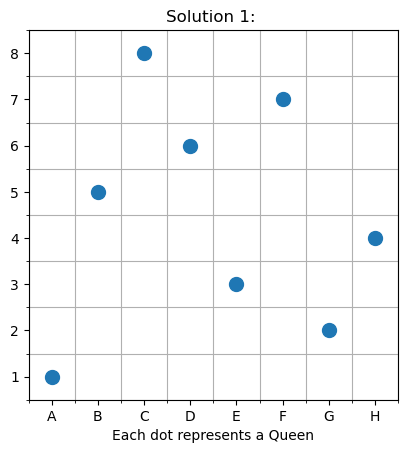

Queens are located in cells:
['A1', 'B5', 'C8', 'D6', 'E3', 'F7', 'G2', 'H4']
_______________________________________________________________________________________________________


In [322]:
#Test:
N = 8                           # Set this to the size of the chessboards length/width. N=8 is a standard chessboard.
onlyFindOneSolution = True      # Set this to 'False' to find ALL possible solutions. Leave at 'True' to find only 1 solution (the first solution), which is significantly faster than finding all solutions!

if onlyFindOneSolution:
    print("Generating a single N-Queens placement solution on a chessboard of N-length and N-size containing N-number Queens.")
else:
    print("Generating N-Queens placement solutions for ALL POSSIBLE placements on a chessboard of N-length and N-size containing N-number Queens.")
    
solutions = FindMaxNumberOfPossibleQueensOnEmptyChessboard(N, onlyFindOneSolution)
print("\nFound {} solution(s). Plotting each solution to a visual representation of the Chessboard.".format(len(solutions)))

# Plot to graphical representation:
i = 1
for chessboard in solutions:
    placements = plotSolutionToGraph(chessboard, "Solution {}: ".format(i))
    print("Queens are located in cells:\n{}".format(placements))
    print("_______________________________________________________________________________________________________")
    i += 1